In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, chi2

# load Data

In [3]:
df = pd.read_csv('..\\data\\heart_disease_PCA.csv')
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,num
0,-0.017550,-0.237562,1.130701,-0.690074,0.292001,0.746005,-0.727584,-0.910318,0.184558,-0.343690,1.367181,0.350511,0.598685,0
1,-1.134815,-0.819412,0.053161,0.362202,0.174615,0.095826,0.764537,-0.511039,-0.343816,0.239566,-0.109062,-0.552569,-0.677350,1
2,-1.865945,-0.325919,0.117007,0.154059,0.059297,-0.125068,-0.099045,-0.030261,-0.041109,0.854383,-0.199566,0.011509,0.022689,1
3,0.897661,0.596087,-0.085740,-0.633255,0.388291,0.411199,0.406543,-0.039662,-0.521288,0.125395,0.995098,-0.390647,-0.211833,0
4,1.314315,-0.852504,0.291158,0.523258,0.308332,-0.268851,-0.274715,0.190862,0.800398,0.029966,-0.049335,-0.180443,0.074683,0


In [4]:
y= df['num']
x= df.drop('num',axis=1)

# Feature importance with Random Forest

In [5]:
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(x,y)
importances = pd.Series(clf.feature_importances_ , index=x.columns).sort_values(ascending=False)

## Create a bar plot for feature importance

Text(0.5, 1.0, 'Feature Importance from Random Forest')

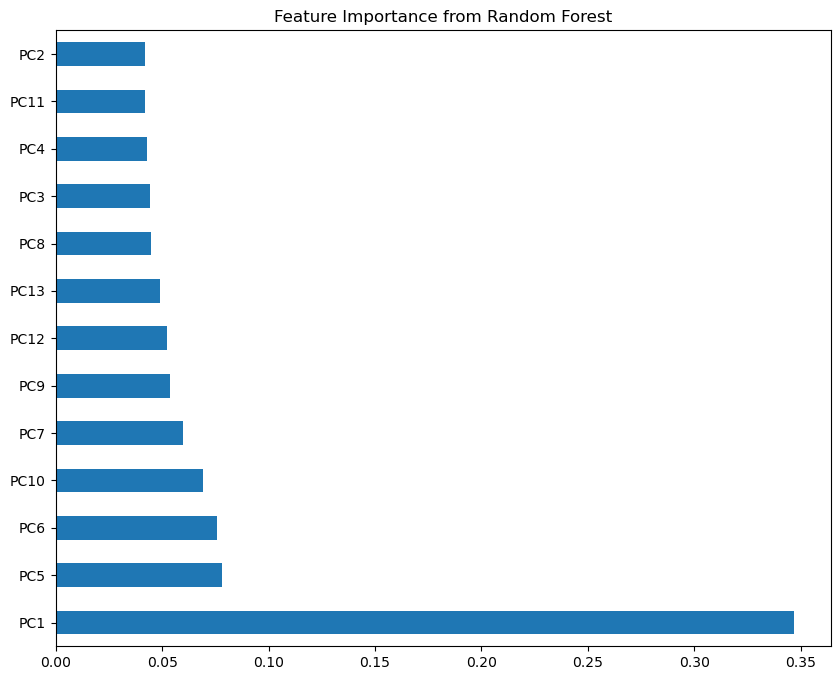

In [6]:
plt.figure(figsize=(10, 8))
importances.plot.barh()
plt.title('Feature Importance from Random Forest')

# Recursive Feature Elimination (RFE) 

In [9]:
model = LogisticRegression(max_iter=5000,random_state=42)
rfe = RFE(model,n_features_to_select=10)
rfe.fit(x,y)
rfe_ranke = pd.Series(rfe.ranking_,index=x.columns)
print("RFE Ranking:\n", rfe_ranke.sort_values())

RFE Ranking:
 PC1     1
PC4     1
PC5     1
PC6     1
PC8     1
PC9     1
PC10    1
PC11    1
PC12    1
PC13    1
PC7     2
PC3     3
PC2     4
dtype: int32


# Chi-Square Test

In [10]:
chi_selector = SelectKBest(chi2,k=10)
chi_selector.fit(x.abs(),y)
chi_scores = pd.Series(chi_selector.scores_,index=x.columns).sort_values(ascending=False)
print("Chi-Square Scores:\n", chi_scores)

Chi-Square Scores:
 PC10    4.810857
PC9     4.177002
PC13    3.248111
PC7     3.125992
PC1     1.192228
PC12    0.352769
PC2     0.197238
PC11    0.147794
PC4     0.126981
PC3     0.062150
PC5     0.037347
PC8     0.004341
PC6     0.000633
dtype: float64


# Select only the most relevant features

In [11]:
top_features = importances.head(9).index
selected_df = x[top_features]
selected_df['num'] = y


C:\Users\abdoa\AppData\Local\Temp\ipykernel_8636\1165278104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['num'] = y


In [12]:
selected_df.head()

,PC1,PC5,PC6,PC10,PC7,PC9,PC12,PC13,PC8,num
0,-0.017550,0.292001,0.746005,-0.343690,-0.727584,0.184558,0.350511,0.598685,-0.910318,0
1,-1.134815,0.174615,0.095826,0.239566,0.764537,-0.343816,-0.552569,-0.677350,-0.511039,1
2,-1.865945,0.059297,-0.125068,0.854383,-0.099045,-0.041109,0.011509,0.022689,-0.030261,1
3,0.897661,0.388291,0.411199,0.125395,0.406543,-0.521288,-0.390647,-0.211833,-0.039662,0
4,1.314315,0.308332,-0.268851,0.029966,-0.274715,0.800398,-0.180443,0.074683,0.190862,0


# saveing Data set

In [13]:
selected_df.to_csv('../data/heart_disease.csv', index=False)